In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tarfile
import math

from tensorflow import keras
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
from keras.callbacks import ReduceLROnPlateau

In [3]:
from keras.layers import AlphaDropout

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
from numpy.random import seed
seed(15)

from tensorflow.random import set_seed
set_seed(15)

In [6]:
queens_csv = '/content/drive/MyDrive/Boro_DFs/queens_df.csv'

In [7]:
queens_df = pd.DataFrame(pd.read_csv(queens_csv))

In [8]:
queens_df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear,Train_Line,Dist_To_Line,Dist_To_Station,Dist_To_Entrance
0,queens,Jamaica,153-30 89th Avenue,2.0,2.0,1040.00,3000.0,-73.802233,40.705192,11432,103.0,1705.0,F,0.002611,0.002604,0.002350
1,queens,Corona,97-11 Horace Harding Expressway,1.0,1.0,713.00,2003.0,-73.861895,40.736073,11368,110.0,2102.0,R,0.005640,0.006315,0.005676
2,queens,Astoria,32-57 46th Street,3.0,2.0,1200.00,3500.0,-73.915120,40.755264,11103,115.0,1943.0,M,0.001530,0.001914,0.001536
3,queens,Long Island City,29-59 Northern Boulevard,0.5,1.0,578.26,3184.0,-73.854861,40.758454,11368,115.0,1943.0,7,0.006741,0.006740,0.006945
4,queens,Woodside,33-16 61st Street,2.0,1.0,843.04,2250.0,-73.903724,40.737006,11377,104.0,1473.0,7,0.008501,0.008655,0.008538


In [9]:
y = queens_df[['Rent']]

In [10]:
X = queens_df.drop(['Borough', 'Rent'], axis=1)
X.head()

,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear,Train_Line,Dist_To_Line,Dist_To_Station,Dist_To_Entrance
0,Jamaica,153-30 89th Avenue,2.0,2.0,1040.00,-73.802233,40.705192,11432,103.0,1705.0,F,0.002611,0.002604,0.002350
1,Corona,97-11 Horace Harding Expressway,1.0,1.0,713.00,-73.861895,40.736073,11368,110.0,2102.0,R,0.005640,0.006315,0.005676
2,Astoria,32-57 46th Street,3.0,2.0,1200.00,-73.915120,40.755264,11103,115.0,1943.0,M,0.001530,0.001914,0.001536
3,Long Island City,29-59 Northern Boulevard,0.5,1.0,578.26,-73.854861,40.758454,11368,115.0,1943.0,7,0.006741,0.006740,0.006945
4,Woodside,33-16 61st Street,2.0,1.0,843.04,-73.903724,40.737006,11377,104.0,1473.0,7,0.008501,0.008655,0.008538


In [11]:
X = pd.get_dummies(X, columns=['Area', 'Address', 'ZipCode', 'Precinct', 'Train_Line'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [13]:
numeric_cols = ['Num_Beds', 'Num_Baths', 'Sq-Ft', 'Long', 'Lat', 'CrimeTotalPastYear', 'Dist_To_Line', 'Dist_To_Station', 'Dist_To_Entrance']

In [14]:
X_train_num = X_train[numeric_cols]

In [15]:
X_test_num = X_test[numeric_cols]

In [16]:
print(X_train_num.shape)
print(X_test_num.shape)

(1936, 9)
(484, 9)


In [17]:
scaler = MinMaxScaler()

In [18]:
X_train_num = scaler.fit_transform(X_train_num)

In [19]:
X_train_num.shape

(1936, 9)

In [20]:
X_test_num = scaler.transform(X_test_num)

In [21]:
X_test_num.shape

(484, 9)

In [22]:
X_train_onehots = X_train.drop(numeric_cols, axis=1)
X_test_onehots = X_test.drop(numeric_cols, axis=1)

In [23]:
X_train_onehots.shape

(1936, 1518)

In [24]:
X_test_onehots.shape

(484, 1518)

In [25]:
X_train = np.concatenate((X_train_num, X_train_onehots), axis=1)

In [26]:
X_test = np.concatenate((X_test_num, X_test_onehots), axis=1)

In [27]:
# create validation set
num_val_insts = math.floor(X_train.shape[0]*(.10))

X_val = X_train[:num_val_insts]
y_val = y_train[:num_val_insts]

X_train = X_train[num_val_insts:]
y_train = y_train[num_val_insts:]

In [28]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1743, 1527), y_train shape: (1743, 1)
X_val shape: (193, 1527), y_val shape: (193, 1)
X_test shape: (484, 1527), y_test shape: (484, 1)


In [29]:
from keras.initializers import lecun_normal

In [30]:
initialiser = lecun_normal(seed=31)

In [31]:
# model

model = models.Sequential()
model.add(layers.Dense(512, activation='selu', input_shape=(X_train.shape[1],), kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(256, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(256, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(128, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(128, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(64, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(64, activation='selu', kernel_initializer=initialiser))


model.add(layers.Dense(1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               782336    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               2

In [33]:
model.compile(loss="huber_loss", optimizer=keras.optimizers.Adam(learning_rate=.001), metrics=["mae"])

In [34]:
early_stop = EarlyStopping(monitor='val_mae', mode='min', 
                           verbose=1, patience=30, min_delta=.5, 
                           restore_best_weights=True)

In [35]:
#reduce on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    patience=15,
    factor=.1,
    mode='min',
    min_delta=.5,
    verbose=1,
    min_lr=.0001
)

In [36]:
history = model.fit(X_train, y_train, epochs=300,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, reduce_lr])

Epoch 1/300
55/55 [==============================] - 5s 11ms/step - loss: 1220.4718 - mae: 1220.9718 - val_loss: 688.0521 - val_mae: 688.5521 - lr: 0.0010
Epoch 2/300
55/55 [==============================] - 0s 5ms/step - loss: 519.8657 - mae: 520.3651 - val_loss: 412.0521 - val_mae: 412.5521 - lr: 0.0010
Epoch 3/300
55/55 [==============================] - 0s 5ms/step - loss: 432.8266 - mae: 433.3266 - val_loss: 384.1694 - val_mae: 384.6694 - lr: 0.0010
Epoch 4/300
55/55 [==============================] - 0s 5ms/step - loss: 353.3028 - mae: 353.8025 - val_loss: 338.5938 - val_mae: 339.0937 - lr: 0.0010
Epoch 5/300
55/55 [==============================] - 0s 5ms/step - loss: 288.6435 - mae: 289.1426 - val_loss: 312.3660 - val_mae: 312.8660 - lr: 0.0010
Epoch 6/300
55/55 [==============================] - 0s 5ms/step - loss: 272.4153 - mae: 272.9149 - val_loss: 391.3401 - val_mae: 391.8394 - lr: 0.0010
Epoch 7/300
55/55 [==============================] - 0s 5ms/step - loss: 258.4174 - m

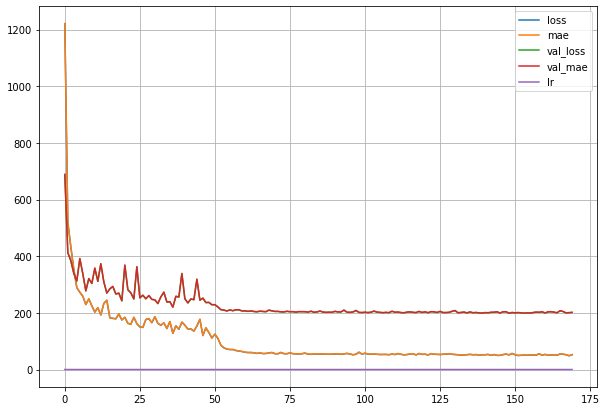

In [37]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

In [38]:
scores = model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 228.1660 - mae: 228.6649


In [39]:
preds = model.predict(X_test, verbose=1)

16/16 [==============================] - 0s 2ms/step


In [47]:
preds[:10].round(2)

array([[1790.44],
       [2192.64],
       [1774.68],
       [2002.07],
       [2253.75],
       [4842.55],
       [2157.63],
       [1838.17],
       [3624.52],
       [1987.39]], dtype=float32)

In [48]:
y_test[:10].round(2)

,Rent
410,1625.0
199,1800.0
1674,1775.0
1124,2049.0
1355,2300.0
891,4900.0
254,2550.0
2105,1850.0
1545,3500.0
1719,2250.0


In [40]:
from scipy import stats

In [41]:
confidence = 0.95

abs_errors = abs(preds.flatten() - y_test.to_numpy().flatten())
stats.t.interval(confidence, len(abs_errors)-1, 
                         loc=abs_errors.mean(), 
                         scale=stats.sem(abs_errors))

(199.01526200374687, 258.31450085701636)

In [ ]:
# Using the full set of features seems to be more effective predicting rent in the Queens borough of the city

In [43]:
model.save("queens_model.h5")

In [44]:
# /content/drive/MyDrive/Boro_DFs/
model.save("/content/drive/MyDrive/Boro_DFs/queens_model.h5")